In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filtro para roles de Data Analyst en Estados Unidos

In [2]:
df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

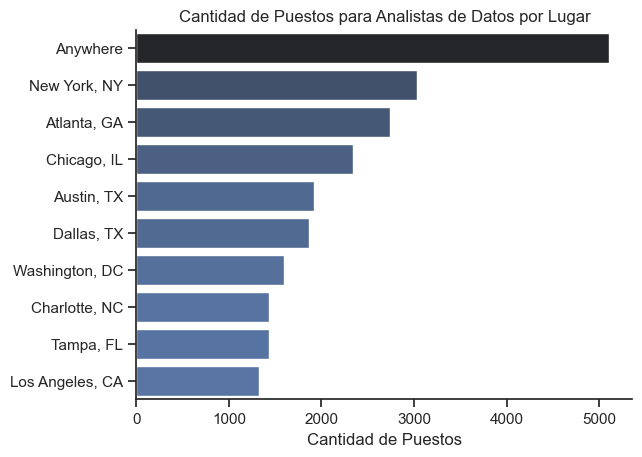

In [3]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Cantidad de Puestos para Analistas de Datos por Lugar')
plt.xlabel('Cantidad de Puestos')
plt.ylabel('')
plt.show()

Requisitos y beneficios:

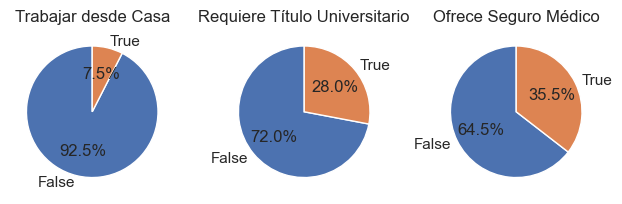

In [4]:
fig, ax = plt.subplots(1, 3)

dict_column = {'job_work_from_home': 'Trabajar desde Casa',
'job_no_degree_mention': 'Requiere Título Universitario',
'job_health_insurance': 'Ofrece Seguro Médico'}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

Compañías para explorar:

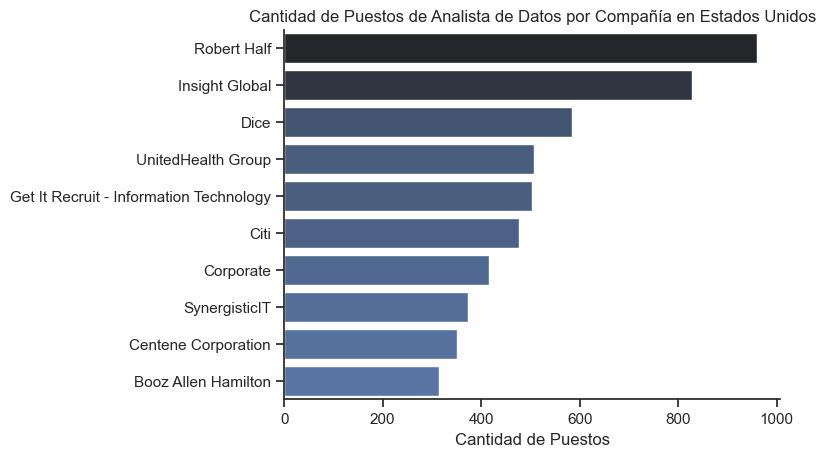

In [5]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Cantidad de Puestos de Analista de Datos por Compañía en Estados Unidos')
plt.xlabel('Cantidad de Puestos')
plt.ylabel('')
plt.show()